#Classification Using a MLP Neural Network





## MLP Architecture

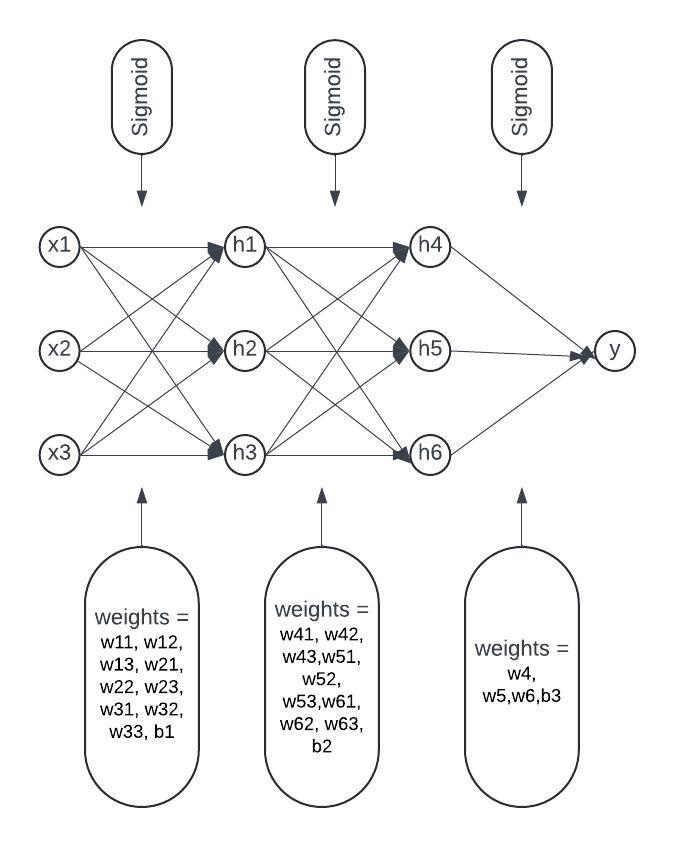

## Implementation

In [107]:
# Import required python libraries

import numpy as np

import pandas as pd

from scipy.optimize import minimize

In [108]:
# Read data from csv file
sample_data = pd.read_csv('CustomerChurn.csv')

sample_data



,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [109]:
# make a copy of the data
data = sample_data.copy()


In [110]:
# choose data features for prediction
data = data[['tenure','products_number','credit_card','churn']]



In [111]:
data = data.values
data

array([[2, 1, 1, 1],
       [1, 1, 0, 0],
       [8, 3, 1, 1],
       ...,
       [7, 1, 0, 1],
       [3, 2, 1, 1],
       [4, 1, 1, 0]])

In [112]:
# define sigmoid function

def sigmoid(x):
  return 1 / (1 + np.exp(-x))



def output(inputs, weights):

  # Extracting weights for layers
  w11, w12, w13, w21, w22, w23, w31, w32, w33,w41, w42, w43,w51, w52, w53,w61, w62, w63,w4, w5,w6, b1, b2, b3 = weights
  x1, x2, x3 = inputs.T

  # Hidden layer
  h1 = sigmoid(w11 * x1 + w12 * x2 + w13 * x3 + b1)
  h2 = sigmoid(w21 * x1 + w22 * x2 + w23 * x3 + b1)
  h3 = sigmoid(w31 * x1 + w32 * x2 + w33 * x3 + b1)
  h4 = sigmoid(w41 * h1 + w42 * h2 + w43 * h3 + b2)
  h5 = sigmoid(w51 * h1 + w52 * h2 + w53 * h3 + b2)
  h6 = sigmoid(w61 * h1 + w62 * h2 + w63 * h3 + b2)
  y = sigmoid(w4 * h4 + w5 * h5 + w6 * h6 + b3)

  return y


# Objective function (Cross Entropy)

def cross_ent(weights):
  predictions = output(X, weights)
  return -np.mean(Y * (np.log(predictions)) + ((1 - Y) * np.log(1 - predictions)))



In [113]:
data

array([[2, 1, 1, 1],
       [1, 1, 0, 0],
       [8, 3, 1, 1],
       ...,
       [7, 1, 0, 1],
       [3, 2, 1, 1],
       [4, 1, 1, 0]])

In [114]:
X = data[:, 0:3]
Y = data[:, -1]

initial_weights = np.random.rand(24)

# Optimizing the weights
result = minimize(cross_ent, initial_weights, method='BFGS')

# Optimized weights
optimized_weights = result.x
optimized_weights, result.fun

(array([ 7.07889523e-02,  1.32673645e+01, -7.88084303e+00,  6.98201884e-03,
         3.34308364e+01,  1.90529228e-04,  2.83622016e+00,  4.20233711e+01,
        -4.63788212e+00, -1.80288444e+00,  1.26796317e+01,  4.39061052e+00,
        -9.12070147e+00,  1.05841266e+01,  3.33120504e-01, -7.41623439e-01,
         9.19030251e+00,  4.44104798e+00, -1.10733260e+01, -1.84702835e+01,
        -9.52411648e+00, -3.04853853e+01, -1.51554734e+01,  9.07185541e+00]),
 0.4361083508663451)

In [115]:
X

array([[2, 1, 1],
       [1, 1, 0],
       [8, 3, 1],
       ...,
       [7, 1, 0],
       [3, 2, 1],
       [4, 1, 1]])

In [116]:
predictions = output(X, optimized_weights)

predictions



array([0.28367943, 0.28606082, 0.84158474, ..., 0.27251657, 0.07274122,
       0.27910366])

In [117]:
#Setting a Threshold of 0.5

Y_Pred = (predictions >= 0.5).astype(int)

Y_Pred

array([0, 0, 1, ..., 0, 0, 0])

In [118]:
# Get the unique values and their counts
unique_values, counts = np.unique(Y_Pred, return_counts=True)

# Create a dictionary to store the sum of occurrences for each unique value
sum_occurrences = {}

# Iterate over each unique value and its count
for value, count in zip(unique_values, counts):
    sum_occurrences[value] = count

# Print the sum of occurrences for each unique value
print("Sum of occurrences for each unique value:")
print(sum_occurrences)

Sum of occurrences for each unique value:
{0: 9674, 1: 326}


## Evaluation and Confusion Matrix

In [151]:
conf_matrix = np.zeros((2, 2))

for i in range(len(Y)):
    conf_matrix[Y[i], Y_Pred[i]] += 1

conf_matrix

array([[7917.,   46.],
       [1757.,  280.]])

In [153]:
TP = conf_matrix[0, 0]  # True Positives
TN = conf_matrix[1, 1]  # True Negatives
FP = conf_matrix[1, 0]  # False Positives
FN = conf_matrix[0, 1]  # False Negatives

# Calculate accuracy
accuracy = (TP + TN) / np.sum(conf_matrix)

print("Accuracy:", accuracy)

Accuracy: 0.8197


In [154]:
FP

1757.0

In [155]:
# Calculate Precision

precision = TP / (TP + FP)

precision

0.8183791606367583

In [158]:
# Calculate Recall
recall = TP / (TP + FN)

recall

0.9942232826824061

In [160]:
# Calculate F1 Score
f1_score = 2 * ((precision * recall) / (precision + recall))

f1_score

0.897771729886035

## Compare to Scikit Learn

In [179]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score
from sklearn.preprocessing import StandardScaler

# It's a good practice to scale the data for neural network training
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Create a neural network model
# Architecture - one hidden layer with 100 neurons (this is the default setting)
mlp = MLPClassifier(hidden_layer_sizes=(4,3,3,3), activation='tanh', solver='adam', max_iter=500, random_state=42)

# Train the model
mlp.fit(X, Y)

# Predict on the test set
predictions = mlp.predict(X)

# Evaluate the model
cm = confusion_matrix(Y, predictions)

print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[7917   46]
 [1757  280]]


In [180]:
TP = conf_matrix[0, 0]  # True Positives
TN = conf_matrix[1, 1]  # True Negatives
FP = conf_matrix[1, 0]  # False Positives
FN = conf_matrix[0, 1]  # False Negatives

print("True Positive (TP):", TP)
print("True Negative (TN):", TN)
print("False Positive (FP):", FP)
print("False Negative (FN):", FN)

True Positive (TP): 7917.0
True Negative (TN): 280.0
False Positive (FP): 1757.0
False Negative (FN): 46.0


In [175]:
scikit_accuracy= accuracy_score(Y, predictions)

scikit_accuracy

0.8197

In [181]:
scikit_precision = TP / (TP + FP)

scikit_precision

0.8183791606367583

In [184]:
scikit_recall = TP / (TP + FN)

scikit_recall

0.9942232826824061

In [185]:
scikit_f1= 2 * ((scikit_precision * scikit_recall) / (scikit_precision + scikit_recall))


scikit_f1

0.897771729886035